In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily  as ctx

In [4]:
#conda install -c conda-forge contextily

In [46]:
#Resultado total de elecciones
df = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")
#Dataframe con datos presidenciales
df_presidencial= df.loc[df.NOMBRE_CATEGORIA == "Presidente y Vicepresidente de la República"]
total=df_presidencial.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False).reset_index(drop=True)
total['Porcentaje'] = (total['VOTOS_AGRUPACION'] / total['VOTOS_AGRUPACION'].sum()) * 100


In [48]:
#Agrupamos por comunas
df_comuna=df_presidencial.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Abreviamos algunos nombres por prolijidad.
cambio_nombres=df_comuna.replace({"FRENTE DE TODOS": "FdT",
                                           "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FIT",
                                           "JUNTOS POR EL CAMBIO": "JxC",
                                           "FRENTE NOS":"NOS",
                                          "UNITE POR LA LIBERTAD Y LA DIGNIDAD":"UNITE"})
comuna_final=pd.DataFrame(data=cambio_nombres) 
comuna_final

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FIT,4368
3,COMUNA 01,FdT,42299
4,COMUNA 01,NOS,1763
...,...,...,...
205,COMUNA 15,MOVIMIENTO DE ACCION VECINAL,159
206,COMUNA 15,NULO,1358
207,COMUNA 15,PARTIDO AUTONOMISTA,125
208,COMUNA 15,RECURRIDO,61


In [51]:
resultados_absolutos=comuna_final.loc[comuna_final.NOMBRE_AGRUPACION == "FdT"].sort_values(by="VOTOS_AGRUPACION", ascending=False)
resultados_absolutos

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
45,COMUNA 04,FdT,57837
101,COMUNA 08,FdT,51803
87,COMUNA 07,FdT,47901
199,COMUNA 15,FdT,47133
157,COMUNA 12,FdT,45793
115,COMUNA 09,FdT,44797
59,COMUNA 05,FdT,43785
31,COMUNA 03,FdT,43139
143,COMUNA 11,FdT,42788
3,COMUNA 01,FdT,42299


In [6]:
#Importo el csv rosetta.
rosetta=pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/rosetta.csv")

In [7]:
rosetta.head()

,CODIGO_MESA_2019,CODIGO_CIRCUITO_2017
0,0100100001X,1001000001
1,0100100002X,1001000001
2,0100100003X,1001000001
3,0100100004X,1001000001
4,0100100005X,1001000001


In [8]:
rosetta.CODIGO_CIRCUITO_2017.unique()

array([1001000001, 1001000002, 1001000003, 1001000004, 1001000005,
       1001000006, 1001000007, 1001000008, 1001000009, 1001000010,
       1001000011, 1001000012, 1001000013, 1001000014, 1001000015,
       1001000016, 1001000017, 1001000018, 1001000019, 1002000020,
       1002000021, 1002000022, 1002000023, 1002000024, 1002000025,
       1002000026, 1002000027, 1002000028, 1002000029, 1003000030,
       1003000031, 1003000032, 1003000033, 1003000034, 1003000035,
       1003000036, 1003000037, 1003000038, 1003000039, 1003000040,
       1003000041, 1003000042, 1004000043, 1004000044, 1004000045,
       1004000046, 1004000047, 1004000048, 1004000049, 1004000050,
       1004000051, 1004000052, 1004000053, 1004000054, 1004000055,
       1004000056, 1004000057, 1005000058, 1005000059, 1005000060,
       1005000061, 1005000062, 1005000063, 1005000064, 1005000065,
       1005000066, 1005000067, 1006000068, 1006000069, 1006000070,
       1006000071, 1006000072, 1006000073, 1006000074, 1007000

In [9]:
#shp de CABA que esta dentro de la carpeta de elecciones 2019
caba= gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/elecciones_2019/CABA.shp")

In [10]:
caba.head()


,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."


In [32]:
caba.circuito.unique()

array(['0003', '0045', '0037', '0018', '0141', '0005', '0020', '0001',
       '0002', '0011', '0012', '0013', '0014', '0015', '0016', '0017',
       '0004', '0006', '0007', '0008', '0009', '0010', '0021', '0022',
       '0023', '0024', '0082', '0025', '0026', '0027', '0028', '0029',
       '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0038',
       '0039', '0040', '0041', '0042', '0043', '0044', '0046', '0047',
       '0048', '0049', '0050', '0051', '0061', '0052', '0053', '0054',
       '0065', '0066', '0055', '0056', '0057', '0058', '0059', '0060',
       '0062', '0063', '0064', '0067', '0068', '0069', '0070', '0071',
       '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079',
       '0080', '0081', '0083', '0084', '0085', '0086', '0089', '0106',
       '0090', '0092', '0093', '0094', '0095', '0096', '0097', '0098',
       '0099', '0100', '0103', '0104', '0105', '0107', '0108', '0109',
       '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117',
      

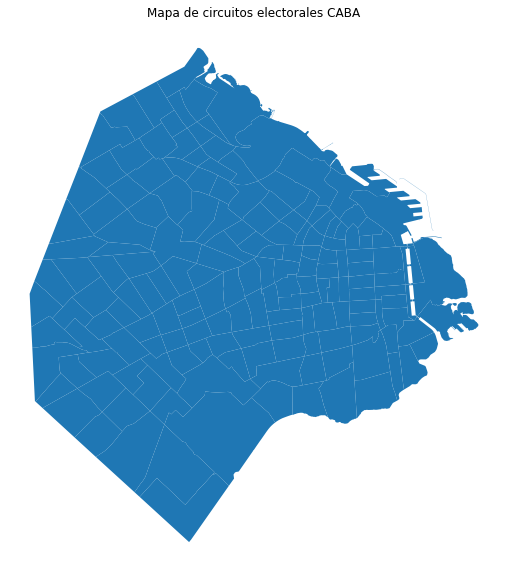

In [41]:
#Mapa circuitos electorales
circuitos=caba.plot(figsize=(10, 10))
circuitos.axis('off')
circuitos.set_title("Mapa de circuitos electorales CABA")
plt.show()

In [52]:
#Para tener mapa base de CABA
comunas_ = gpd.read_file("C:/Users/W10/OneDrive/Escritorio/comunas/comunas_wgs84.shp")
comunas_

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."
5,9,LIMITE COMUNAL,14.0,PALERMO,22126.531858,1.584587e+07,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
6,11,LIMITE COMUNAL,15.0,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5..."
7,15,LIMITE COMUNAL,13.0,BELGRANO - COLEGIALES - NUÑEZ,26198.826953,1.471321e+07,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5..."
8,13,LIMITE COMUNAL,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6..."
9,2,LIMITE COMUNAL,5.0,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6..."


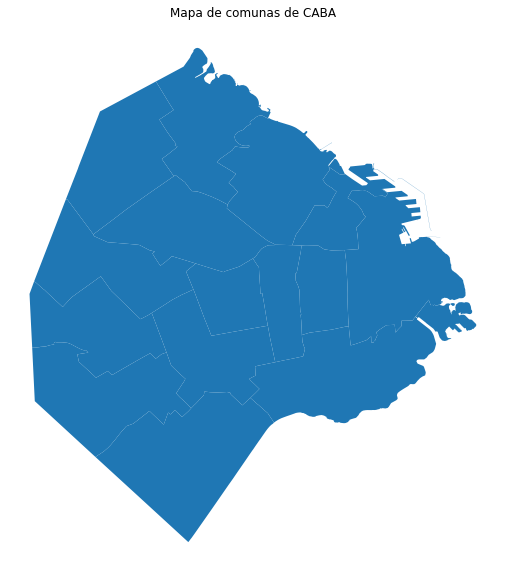

In [45]:
comunas_mapa=comunas_.plot(figsize=(10, 10))
comunas_mapa.axis("off")
comunas_mapa.set_title("Mapa de comunas de CABA")
plt.show()

In [15]:
#Este es el shp de CABA del  censo 2010.
caba_censo=gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")

In [16]:
caba_censo.head()

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
0,1760908.00,7579.745,2,1,02,013,03,02,U,020130302,312.0,342.0,654.0,270.0,377.0,265.0,"POLYGON ((4192267.085 6152975.831, 4192240.425..."
1,2240206.00,14184.670,3,2,02,013,11,01,U,020131101,296.0,272.0,568.0,172.0,217.0,170.0,"POLYGON ((4193005.531 6152773.045, 4193022.852..."
2,28001.00,720.460,4,3,02,013,01,04,U,020130104,379.0,384.0,763.0,367.0,524.0,355.0,"POLYGON ((4192119.600 6153045.088, 4192222.042..."
3,68016.38,1084.790,5,4,02,013,01,03,U,020130103,286.0,326.0,612.0,258.0,314.0,254.0,"POLYGON ((4192119.600 6153045.088, 4192124.424..."
4,53839.88,948.102,6,5,02,013,01,02,U,020130102,373.0,397.0,770.0,343.0,408.0,340.0,"POLYGON ((4191961.799 6152874.180, 4191960.076..."


In [17]:
#DEPTO son las comunas
caba_censo.DEPTO.unique()

array(['013', '012', '014', '002', '015', '001', '011', '005', '003',
       '006', '010', '007', '004', '009', '008'], dtype=object)

In [18]:
caba_censo.shape

(3555, 17)

In [19]:
nbi=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/Labels/HOGAR-ALGUNBI-LABELS.CSV", sep=";")

In [20]:
nbi.head()

,ALGUNBI,label
0,0,Hogares sin NBI
1,1,Hogares con NBI
2,3,MISSING
3,2,NOTAPPLICABLE
